In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

from sklearn.metrics import mean_squared_error

In [2]:
np.random.seed(42)
steps = np.random.standard_normal(1000)
steps[0] = 0

In [3]:
random_walk = np.cumsum(steps)

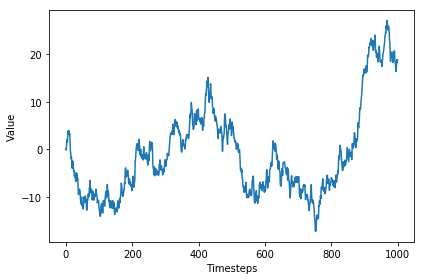

In [4]:
fig, ax = plt.subplots()
ax.plot(random_walk)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')
plt.tight_layout()

In [5]:
ADF_result = adfuller(random_walk)
ADF_result

(-0.965952487691875,
 0.7654789696692581,
 0,
 999,
 {'1%': -3.4369127451400474,
  '5%': -2.864437475834273,
  '10%': -2.568312754566378},
 2735.41783678331)

In [6]:
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -0.965952487691875
p-value: 0.7654789696692581


**p-value** is greater than 0.05. This time series is **not stationary**

If the test returns a p-value less than a certain significance level, typically 0.05 or 0.01, then we can reject the null hypothesis, meaning that there are no unit roots, and so the series is stationary

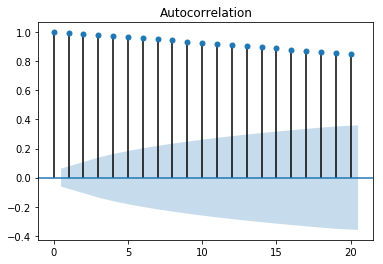

In [7]:
plot_acf(random_walk, lags=20);

The autocorrelation coefficients slowly decrease as the lag increases, which is a clear indicator that our random walk is not a stationary process

## Apply a transformation to make it stationary

In [8]:
diff_random_walk = np.diff(random_walk, n=1)

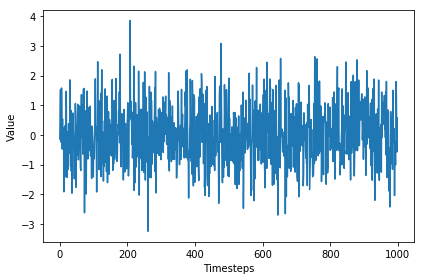

In [9]:
fig, ax = plt.subplots()
ax.plot(diff_random_walk)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')
plt.tight_layout()

In [10]:
ADF_result = adfuller(diff_random_walk)
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -31.789310857560594
p-value: 0.0


This prints out an ADF statistic of –31.79 with a p-value of 0. This time the ADF statistic is a large negative number, and the p-value is less than 0.05. Therefore, we reject the null hypothesis, and we can say that this process has no unit root and is thus **stationary**

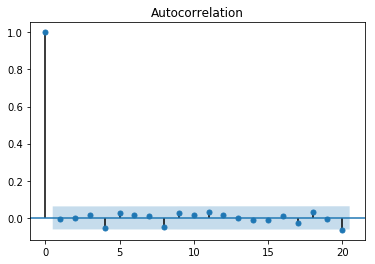

In [11]:
plot_acf(diff_random_walk, lags=20);

There are no significant autocorrelation coefficients after lag 0. This means that the stationary process is completely random and can therefore be described as white noise

## Is GOOGL a random walk

In [12]:
df = pd.read_csv('../data/GOOGL.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-27,1292.000000,1294.099976,1265.060059,1270.859985,1270.859985,2209300
1,2020-04-28,1283.199951,1284.760010,1230.380005,1232.589966,1232.589966,4035000
2,2020-04-29,1345.000000,1360.150024,1326.729980,1342.180054,1342.180054,5417900
3,2020-04-30,1331.359985,1350.000000,1321.500000,1346.699951,1346.699951,2792100
4,2020-05-01,1324.089966,1351.430054,1309.660034,1317.319946,1317.319946,2443600
...,...,...,...,...,...,...,...
248,2021-04-21,2272.050049,2280.000000,2244.820068,2278.350098,2278.350098,1160200
249,2021-04-22,2275.399902,2288.879883,2240.320068,2252.520020,2252.520020,1207300
250,2021-04-23,2267.000000,2306.120117,2261.250000,2299.929932,2299.929932,1453300
251,2021-04-26,2304.520020,2324.530029,2297.320068,2309.929932,2309.929932,1595200


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:2019: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:249: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:251: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


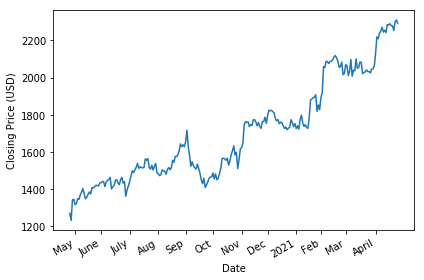

In [13]:
fig, ax = plt.subplots()
ax.plot(df['Date'], df['Close'])
ax.set_xlabel('Date')
ax.set_ylabel('Closing Price (USD)')
plt.xticks(
    [4, 24, 46, 68, 89, 110, 132, 152, 174, 193, 212, 235],
    ['May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', '2021', 'Feb', 'Mar', 'April']
)
fig.autofmt_xdate()
plt.tight_layout()

In [14]:
GOOGL_ADF_result = adfuller(df['Close'])
print('ADF Statistics: {}'.format(GOOGL_ADF_result[0]))
print('p-value: {}'.format(GOOGL_ADF_result[1]))

ADF Statistics: 0.1602504866477138
p-value: 0.9699419435913057


p-value greater than 0.05, so we know that our data is **not stationary**

### Difference GOOGL to see if it makes it stationary

In [15]:
diff_close = np.diff(df['Close'], n=1)
GOOGL_diff_ADF_result = adfuller(diff_close)

print('ADF Statistics: {}'.format(GOOGL_diff_ADF_result[0]))
print('p-value: {}'.format(GOOGL_diff_ADF_result[1]))

ADF Statistics: -5.303439704295231
p-value: 5.386530961454658e-06


p-value smaller than 0.05, meaning that we have a **stationary** process

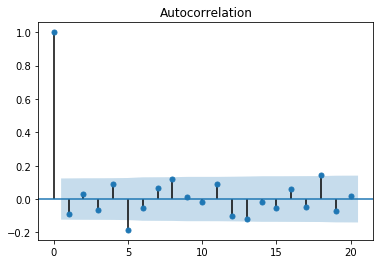

In [16]:
plot_acf(diff_close, lags=20);

There are not any significant coefficients, except at lags 5 and 18. This situation can arise sometimes, and it is due to chance only. In such a situation, we can safely assume that the coefficients at lags 5 and 18 are not significant, because we do not have consecutive significant coefficients.

Therefore, we can conclude that the closing price of **GOOGL can be approximated by a random walk process**

## Forecasting on a long horizon

In [17]:
df = pd.DataFrame({'value': random_walk})
df

,value
0,0.000000
1,-0.138264
2,0.509424
3,2.032454
4,1.798301
...,...
995,16.395408
996,18.193095
997,18.833938
998,18.262759


In [18]:
train = df[:800]
test = df[800:]

In [19]:
train

,value
0,0.000000
1,-0.138264
2,0.509424
3,2.032454
4,1.798301
...,...
795,-7.514968
796,-7.554523
797,-6.873022
798,-6.844704


In [20]:
test

,value
800,-5.876664
801,-6.392708
802,-6.296588
803,-6.758863
804,-7.193359
...,...
995,16.395408
996,18.193095
997,18.833938
998,18.262759


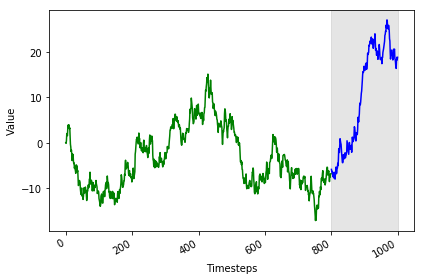

In [21]:
fig, ax = plt.subplots()
ax.plot(train['value'], 'g', label='Train')
ax.plot(test['value'], 'b', label='Test')
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')
ax.axvspan(800, 999, color='#808080', alpha=0.2)
fig.autofmt_xdate()
plt.tight_layout()

We can only use naive forecasting methods for this situation, since we are dealing with a random walk

In [22]:
mean = np.mean(train['value'])
test.loc[:, 'pred_mean'] = mean
test

/home/msdc/.local/lib/python3.6/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/msdc/.local/lib/python3.6/site-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,value,pred_mean
800,-5.876664,-3.677206
801,-6.392708,-3.677206
802,-6.296588,-3.677206
803,-6.758863,-3.677206
804,-7.193359,-3.677206
...,...,...
995,16.395408,-3.677206
996,18.193095,-3.677206
997,18.833938,-3.677206
998,18.262759,-3.677206


In [23]:
last_value = train['value'].iloc[-1]
test.loc[:, 'pred_last'] = last_value
test

/home/msdc/.local/lib/python3.6/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/msdc/.local/lib/python3.6/site-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,value,pred_mean,pred_last
800,-5.876664,-3.677206,-6.814947
801,-6.392708,-3.677206,-6.814947
802,-6.296588,-3.677206,-6.814947
803,-6.758863,-3.677206,-6.814947
804,-7.193359,-3.677206,-6.814947
...,...,...,...
995,16.395408,-3.677206,-6.814947
996,18.193095,-3.677206,-6.814947
997,18.833938,-3.677206,-6.814947
998,18.262759,-3.677206,-6.814947


In [24]:
deltaX = train.index[-1] - train.index[0]
deltaY = train['value'].iloc[-1] - train['value'].iloc[0]
drift = deltaY / deltaX
drift

-0.008529346056640632

In [25]:
x_vals = np.arange(800, 1000, 1)
pred_drift = drift * x_vals
test.loc[:, 'pred_drift'] = pred_drift
test

/home/msdc/.local/lib/python3.6/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/msdc/.local/lib/python3.6/site-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,value,pred_mean,pred_last,pred_drift
800,-5.876664,-3.677206,-6.814947,-6.823477
801,-6.392708,-3.677206,-6.814947,-6.832006
802,-6.296588,-3.677206,-6.814947,-6.840536
803,-6.758863,-3.677206,-6.814947,-6.849065
804,-7.193359,-3.677206,-6.814947,-6.857594
...,...,...,...,...
995,16.395408,-3.677206,-6.814947,-8.486699
996,18.193095,-3.677206,-6.814947,-8.495229
997,18.833938,-3.677206,-6.814947,-8.503758
998,18.262759,-3.677206,-6.814947,-8.512287


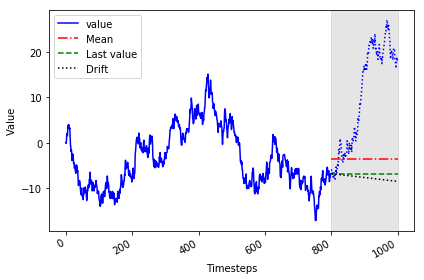

In [26]:
fig, ax = plt.subplots()
ax.plot(train['value'], 'b-')
ax.plot(test['value'], 'b:')
ax.plot(test['pred_mean'], 'r-.', label='Mean')
ax.plot(test['pred_last'], 'g--', label='Last value')
ax.plot(test['pred_drift'], 'k:', label='Drift')
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')
ax.axvspan(800, 999, color='#808080', alpha=0.2)
ax.legend(loc=2)
fig.autofmt_xdate()
plt.tight_layout()

In [27]:
mse_mean = mean_squared_error(test['value'], test['pred_mean'])
mse_mean

326.50277395297474

In [28]:
mse_last = mean_squared_error(test['value'], test['pred_last'])
mse_last

425.1726033055617

In [29]:
mse_drift = mean_squared_error(test['value'], test['pred_drift'])
mse_drift

465.9076036601397

## Forecasting the next timestep

In [30]:
df_shift = df.shift(periods=1)
df_shift

,value
0,NaN
1,0.000000
2,-0.138264
3,0.509424
4,2.032454
...,...
995,16.676509
996,16.395408
997,18.193095
998,18.833938


In [31]:
test.loc[:, 'pred_shift'] = df_shift[800:]
test

/home/msdc/.local/lib/python3.6/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/msdc/.local/lib/python3.6/site-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,value,pred_mean,pred_last,pred_drift,pred_shift
800,-5.876664,-3.677206,-6.814947,-6.823477,-6.814947
801,-6.392708,-3.677206,-6.814947,-6.832006,-5.876664
802,-6.296588,-3.677206,-6.814947,-6.840536,-6.392708
803,-6.758863,-3.677206,-6.814947,-6.849065,-6.296588
804,-7.193359,-3.677206,-6.814947,-6.857594,-6.758863
...,...,...,...,...,...
995,16.395408,-3.677206,-6.814947,-8.486699,16.676509
996,18.193095,-3.677206,-6.814947,-8.495229,16.395408
997,18.833938,-3.677206,-6.814947,-8.503758,18.193095
998,18.262759,-3.677206,-6.814947,-8.512287,18.833938


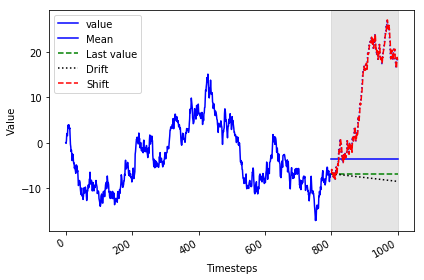

In [32]:
fig, ax = plt.subplots()
ax.plot(train['value'], 'b-')
ax.plot(test['value'], 'b:')
ax.plot(test['pred_mean'], 'b-', label='Mean')
ax.plot(test['pred_last'], 'g--', label='Last value')
ax.plot(test['pred_drift'], 'k:', label='Drift')
ax.plot(test['pred_shift'], 'r--', label='Shift')
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')
ax.axvspan(800, 999, color='#808080', alpha=0.2)
ax.legend(loc=2)
fig.autofmt_xdate()
plt.tight_layout()

In [33]:
mse_one_step = mean_squared_error(test['value'], test['pred_shift'])
mse_one_step

0.9256876651440581